# Laptop Price Prediction

In [185]:
# Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
df = pd.read_csv("laptop_data.csv")

In [187]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [188]:
# Look at the last 5 rows of the dataset
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [189]:
df.shape

(1303, 12)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [191]:
# Checking for missing values
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [192]:
# Checking duplicates values in the dataset

df.duplicated().sum()

np.int64(0)

In [193]:
# Drop the unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [195]:
print(df['Ram'].unique())
df['Ram(GB)'] = df['Ram'].str.replace('GB', '').astype(int) # Remove 'GB' and convert to int
print(df['Ram(GB)'].unique())


['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
[ 8 16  4  2 12  6 32 24 64]


In [196]:
print(df['Weight'].unique())
df['Weight(KG)'] = df['Weight'].str.replace('kg', '').astype(float) # Remove 'kg' and convert to float

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg'
 '1.35kg' '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg'
 '2kg' '2.65kg' '2.77kg' '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg'
 '2.43kg' '1.7kg' '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg'
 '1.63kg' '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg'
 '1.58kg' '1.85kg' '1.23kg' '1.26kg' '2.16kg' '2.36kg' '2.05kg' '1.32kg'
 '1.75kg' '0.97kg' '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg'
 '2.03kg' '1.05kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg'
 '1.12kg' '1.42kg' '3.49kg' '3.35kg' '2.23kg' '4.42kg' '2.69kg' '2.37kg'
 '4.7kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg'
 '2.24kg' '2.67kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '1.84kg' '2.6kg' '2.26kg'
 '3.25kg' '1.59kg' '1.13kg' '1.78kg' '1.10kg' '1.15kg' '1.27kg' '1.43kg

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Ram(GB)           1303 non-null   int64  
 12  Weight(KG)        1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [198]:
# Remove the 'Weight' and 'RAM' column as we have created 'Weight(KG)' and 'Ram(GB)' columns
df.drop(columns=['Ram', 'Weight'], inplace=True)


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Price             1303 non-null   float64
 9   Ram(GB)           1303 non-null   int64  
 10  Weight(KG)        1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<Axes: xlabel='Price', ylabel='Count'>

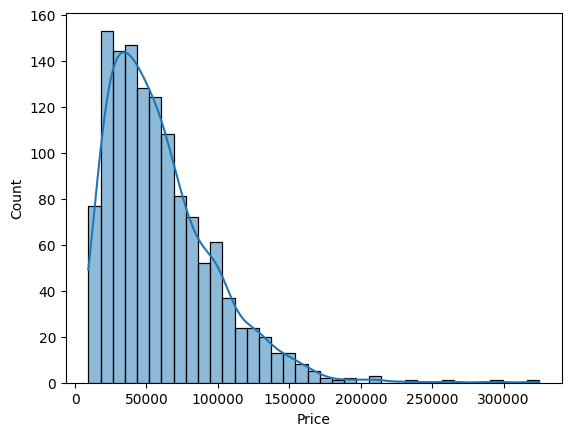

In [200]:
# Checking the Price column for any anomalies
sns.histplot(df['Price'], kde=True) 

--> Price Column data is Right Skewed

<Axes: ylabel='Company'>

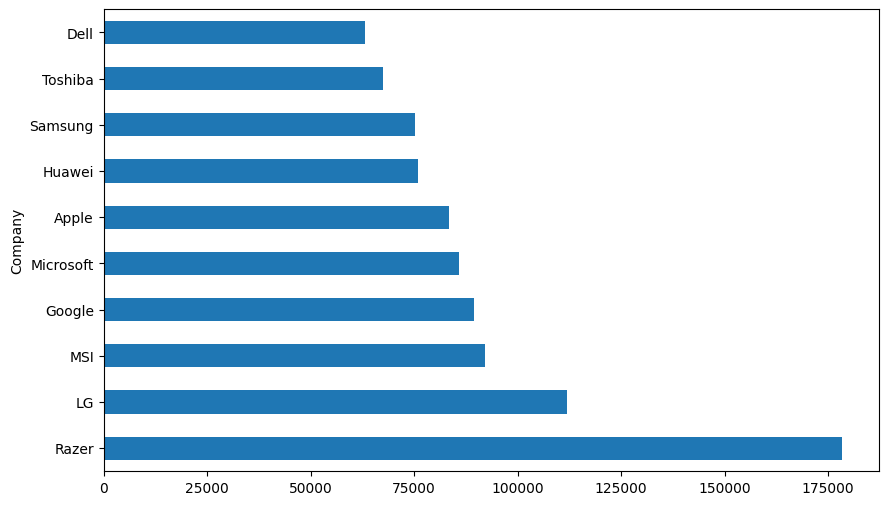

In [201]:
# # Compare MEAN of Price column with the rest of the columns
df.groupby('Company')['Price'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))

In [202]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False)

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

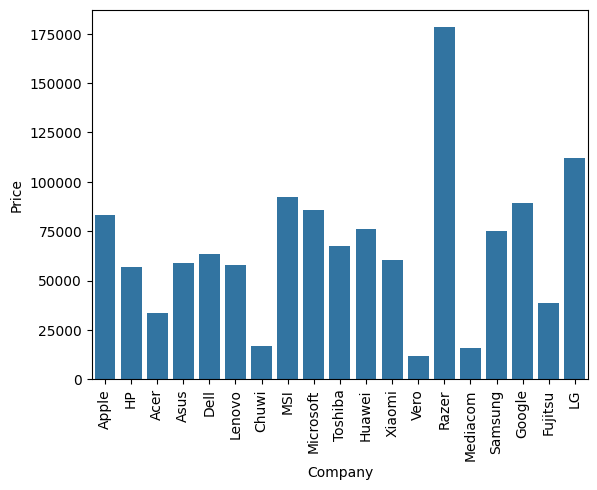

In [203]:
# Average Price of Laptop by Company
sns.barplot(x='Company', y='Price', data=df, estimator=np.mean, errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [204]:
df['TypeName'].value_counts().head(10)

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

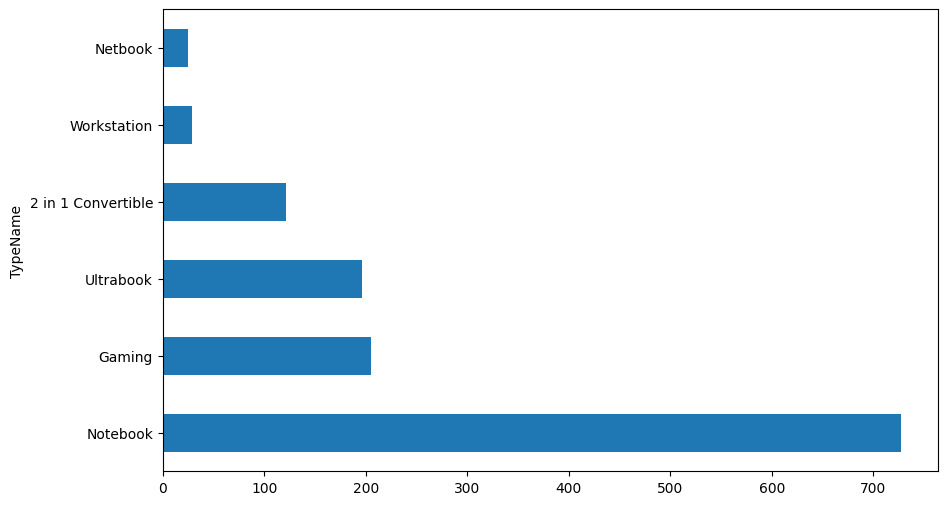

In [205]:
# Which type of Notebook is most selling?
df['TypeName'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))
plt.show()

--> Notebook type laptop is most selling laptop

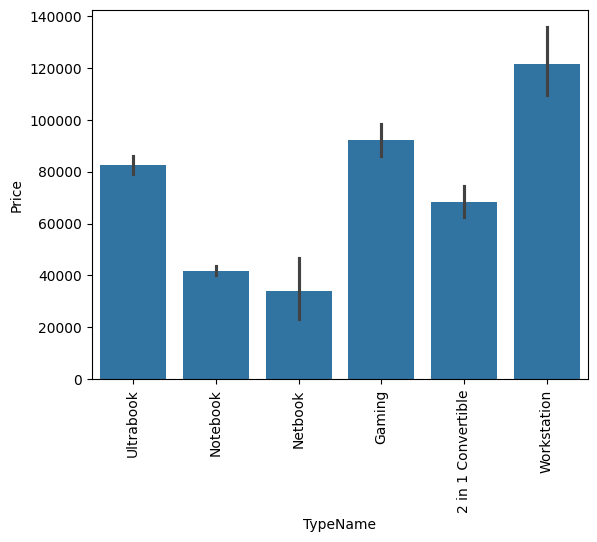

In [206]:
# Average Price of Laptop by its Type
sns.barplot(x='TypeName', y='Price', data=df, estimator=np.mean)
plt.xticks(rotation=90) 
plt.show()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


<Axes: xlabel='Inches', ylabel='Count'>

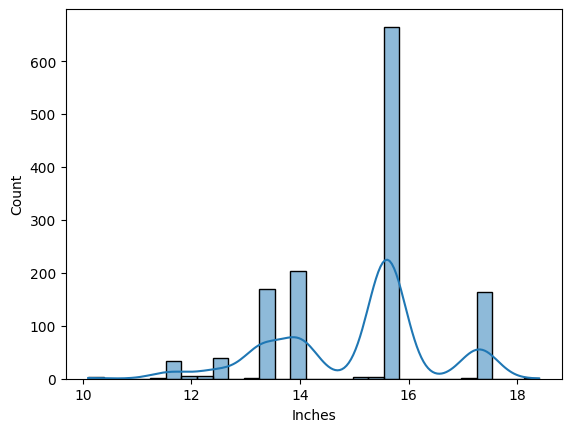

In [207]:
# Most selling Screen Inches
print(df['Inches'].value_counts())

# Make Histplot
sns.histplot(df['Inches'], kde=True)

--> Most of selling Screen is 15.6 Inches

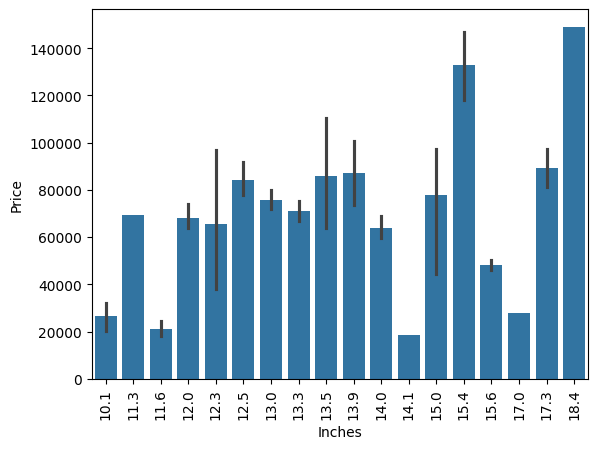

In [208]:
# Barplot of screen Inches and Price
sns.barplot(x='Inches', y='Price', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [209]:
# Count of Screen Resolution

df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [210]:
# Making column Touchscreen with classification 0 and 1
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)



In [211]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,1TB HDD,Intel HD Graphics 500,Windows 10,18061.92,4,2.0,0
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,512GB SSD,Intel HD Graphics 620,Windows 10,142790.40,16,1.2,1
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,32GB Flash Storage,Intel HD Graphics 500,Windows 10,14652.00,2,1.1,1
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,172627.20,32,4.6,0
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,111834.72,16,2.8,0


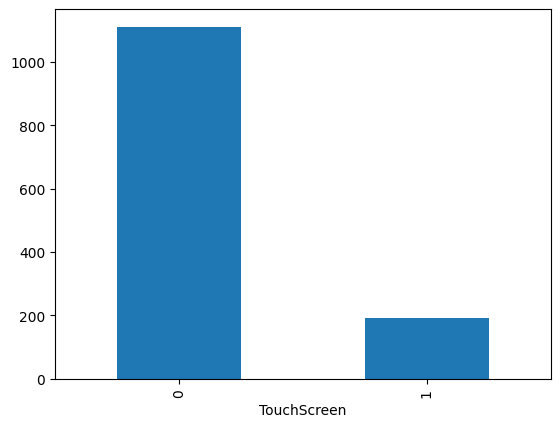

In [212]:
# Counting touchscreen and making barplot
df['TouchScreen'].value_counts().plot(kind='bar')
plt.show()

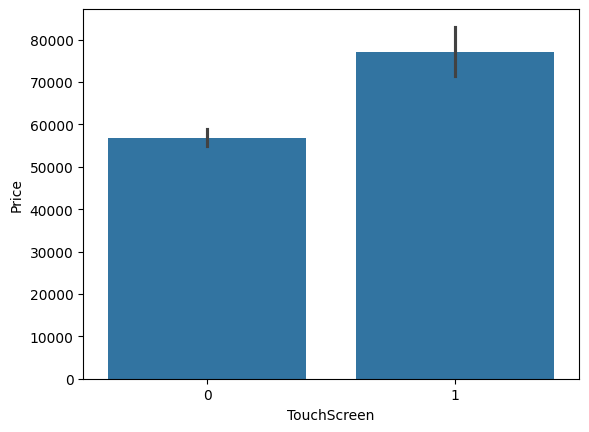

In [213]:
# Chart between Price and TouchScreen
sns.barplot(x='TouchScreen', y='Price', data=df)
plt.show()

--> Touchscreen Laptops are expensive

In [214]:
df['Ips']  = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


In [215]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage,Intel HD Graphics 400,Windows 10,10224.432,2,0.98,0,0
983,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,256GB SSD,Intel HD Graphics 520,Windows 10,34578.720,4,2.30,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,512GB SSD,Nvidia GeForce MX150,Windows 10,79653.600,16,1.30,0,0
741,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,256GB SSD,Intel HD Graphics 520,Windows 10,35431.200,8,2.00,0,0
98,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,256GB SSD,Nvidia GeForce 920M,Windows 10,30742.560,6,2.00,0,0


<Axes: xlabel='Ips'>

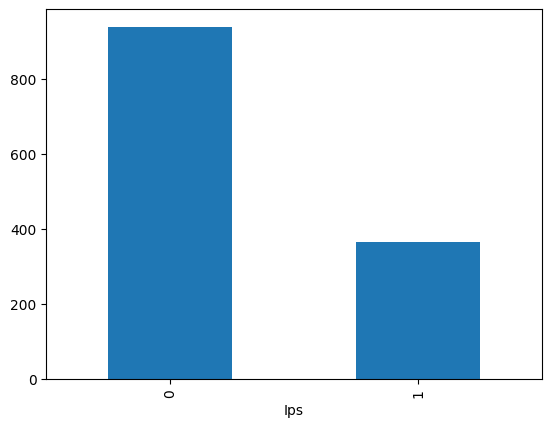

In [216]:
# Ips counting and plot bar chart
df['Ips'].value_counts().plot(kind='bar')

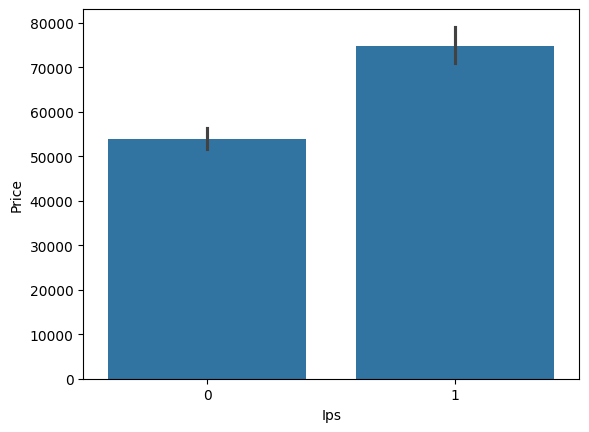

In [217]:
# Price VS IPS bar graph
sns.barplot(x=df['Ips'], y=df['Price'])
plt.show()

In [218]:
# Making new dataset
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

''' x ke basis pe split kar diya and n=1 matlab only 1 split hoga matlab Only the 
first occurrence of 'x' is used as a separator.
expand=True means return into column form  otherwise it will return into row form'''



" x ke basis pe split kar diya and n=1 matlab only 1 split hoga matlab Only the \nfirst occurrence of 'x' is used as a separator.\nexpand=True means return into column form  otherwise it will return into row form"

In [219]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [220]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [221]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,IPS Panel Retina Display 2560,1600


In [222]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

# isme 3 chij kiya gya hain pehle toh , ko replace kiya hain phir findall
# kiya hain jo ki string ko find karega aur uski jagah numeric value milega 
# aur uske baad apply kiya hain lambda function jisse ki list se nikal ke 1 value return
# karega


In [223]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,2560,1600


In [224]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Price             1303 non-null   float64
 9   Ram(GB)           1303 non-null   int64  
 10  Weight(KG)        1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [226]:
# Check the correlation of Price columns with other columns
df.corr(numeric_only=True)['Price']

Inches         0.068197
Price          1.000000
Ram(GB)        0.743007
Weight(KG)     0.210370
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

<Axes: >

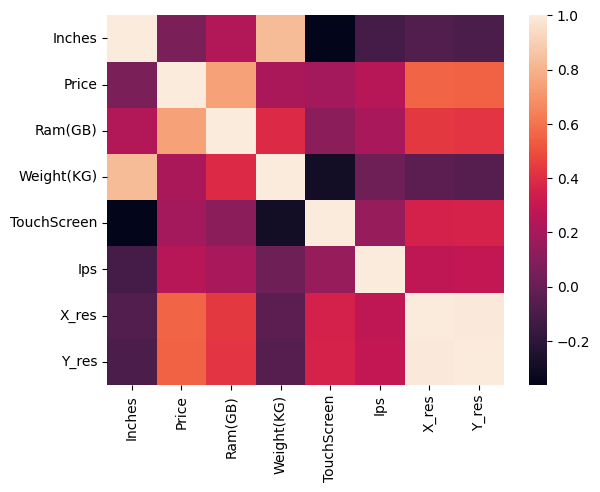

In [227]:
sns.heatmap(df.corr(numeric_only=True))

In [228]:
# Make PPI --> Pixels per Inches
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')


In [229]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Price          1.000000
Ram(GB)        0.743007
Weight(KG)     0.210370
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [230]:
# Drop unnecessary column
df.drop(columns=['ScreenResolution'], inplace=True)


In [231]:
df.drop(columns=['Inches','X_res','Y_res'], inplace=True)
# We drop this columns because it used in PPI Column so there is no importnce of them 

In [232]:
df.head()

,Company,TypeName,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,226.983005


In [233]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [234]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [235]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [236]:

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [237]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [238]:
df['Cpu brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu brand, Length: 1303, dtype: object

<Axes: xlabel='Cpu brand'>

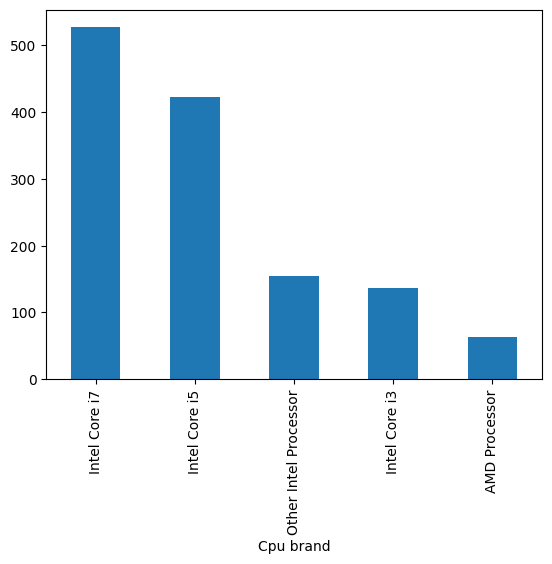

In [239]:
df['Cpu brand'].value_counts().plot(kind='bar')

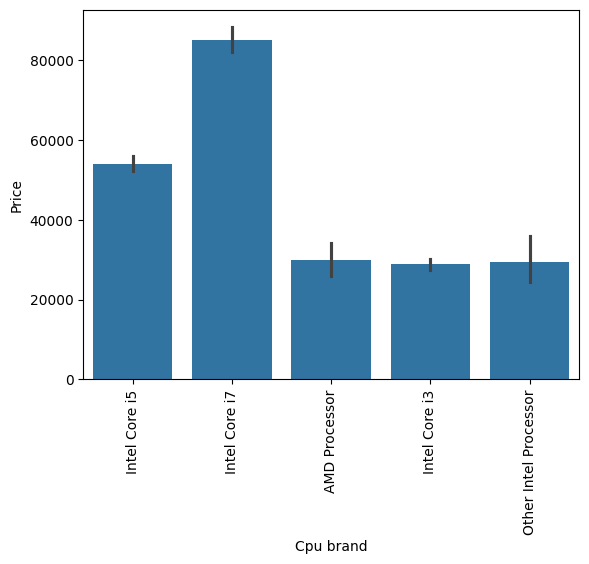

In [240]:

sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [241]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [242]:
df.head()

,Company,TypeName,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,127.677940,Intel Core i5
2,HP,Notebook,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram(GB)'>

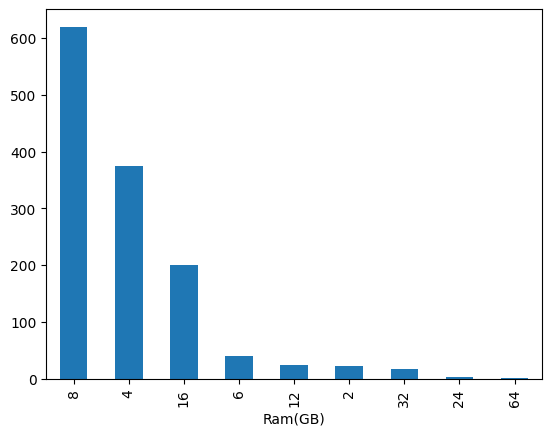

In [243]:
df['Ram(GB)'].value_counts().plot(kind='bar')

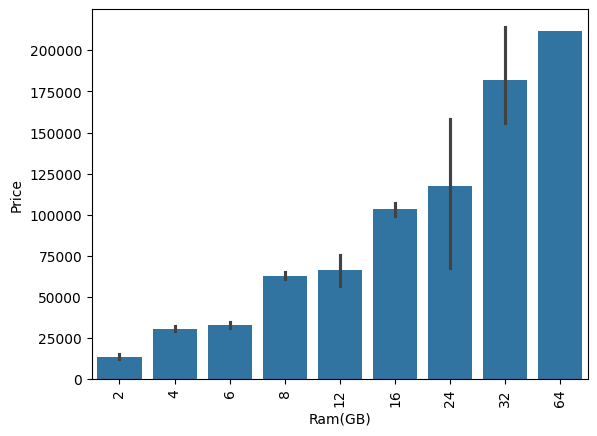

In [244]:
# RAM VS Price Bar plot

sns.barplot(x=df['Ram(GB)'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [245]:
# Memory Counting
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [246]:
# Convert 'Memory' column to string and clean up 'GB' and 'TB'
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)
df['Memory'] = df['Memory'].str.replace('TB', '024', regex=False)  # Convert TB to GB (1TB = 1024GB)

# Split the memory column into two parts
new = df['Memory'].str.split('+', n=1, expand=True)

# Process the first memory component
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0').str.strip()  # Process the second memory component (if exists)

# Identify storage types for the first memory component
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from the first memory component
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Identify storage types for the second memory component
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from the second memory component
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert first and second columns to integers
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

# Calculate total sizes for each storage type
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)



In [247]:
df.head(5)

,Company,TypeName,Memory,Gpu,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,128 SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,128 Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,256 SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,512 SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,256 SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0


In [248]:
# Drop Memory Column
df.drop(columns=['Memory'],inplace=True)

In [249]:
# Correlation of columns with Memory location
df.corr(numeric_only=True)['Price']

Price            1.000000
Ram(GB)          0.743007
Weight(KG)       0.210370
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.095091
SSD              0.670682
Hybrid           0.008011
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [250]:
# Drop the column which have less correlaton with price
df.drop(columns=['HDD', 'Flash_Storage'], inplace=True)

In [251]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [252]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [253]:
df['Gpu brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1303, dtype: object

In [254]:
df.drop(columns=['Gpu'], inplace=True)

In [255]:
df.head()

,Company,TypeName,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,SSD,Hybrid,Gpu brand
0,Apple,Ultrabook,macOS,71378.6832,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,macOS,47895.5232,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,No OS,30636.0000,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,macOS,135195.3360,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,macOS,96095.8080,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel


In [256]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [257]:
# Removing ARM Gpu brand beause it makes imbalnce
df = df[df['Gpu brand'] != 'ARM']


In [258]:
df

,Company,TypeName,OpSys,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,SSD,Hybrid,Gpu brand
0,Apple,Ultrabook,macOS,71378.6832,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,macOS,47895.5232,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,No OS,30636.0000,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,macOS,135195.3360,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,macOS,96095.8080,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows 10,33992.6400,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel
1299,Lenovo,2 in 1 Convertible,Windows 10,79866.7200,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel
1300,Lenovo,Notebook,Windows 10,12201.1200,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,Windows 10,40705.9200,6,2.19,0,0,100.454670,Intel Core i7,0,0,AMD


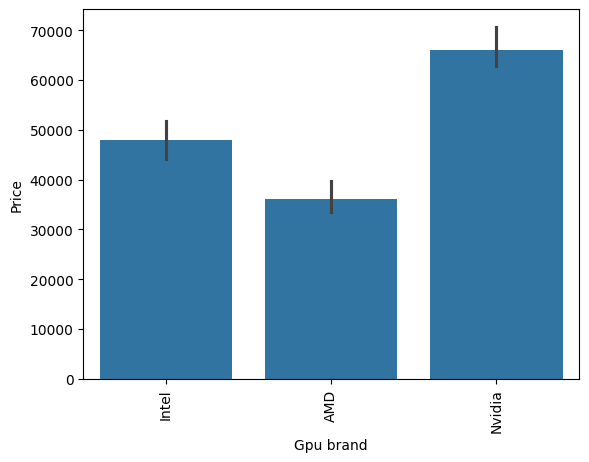

In [259]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [260]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

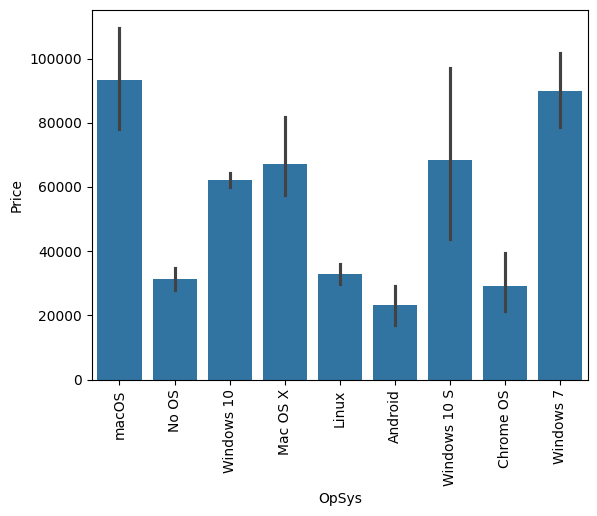

In [261]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [262]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [263]:
df['os'] = df['OpSys'].apply(cat_os)

In [264]:
df.drop(columns=['OpSys'], inplace=True)

In [265]:
df.head()

,Company,TypeName,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,SSD,Hybrid,Gpu brand,os
0,Apple,Ultrabook,71378.6832,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,47895.5232,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,30636.0000,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,135195.3360,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,96095.8080,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


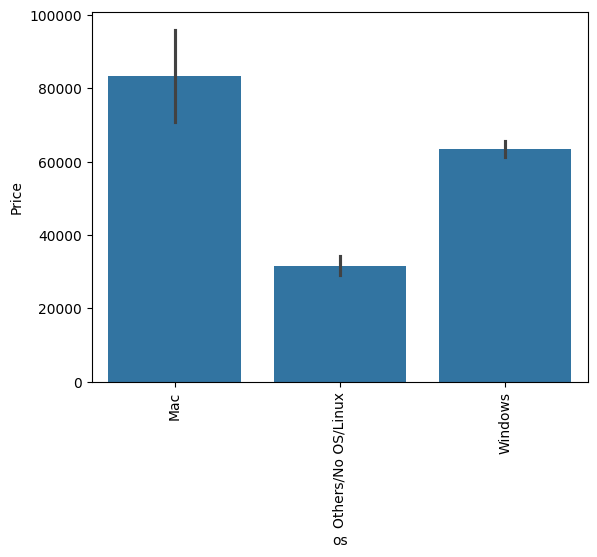

In [266]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

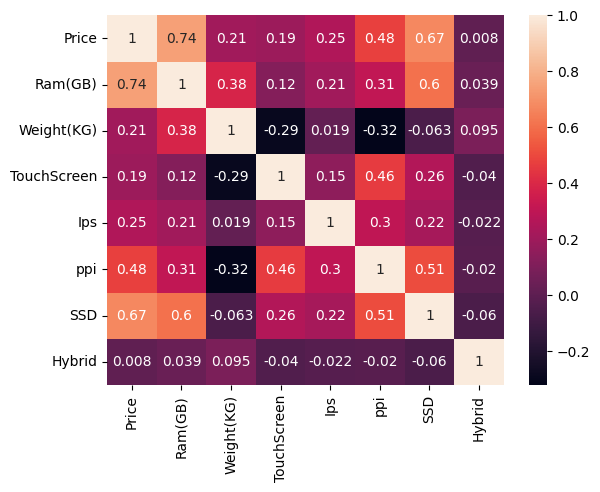

In [267]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [268]:
df.corr(numeric_only=True)['Price']

Price          1.000000
Ram(GB)        0.742905
Weight(KG)     0.209867
TouchScreen    0.192917
Ips            0.253320
ppi            0.475368
SSD            0.670543
Hybrid         0.007963
Name: Price, dtype: float64

<Axes: xlabel='Weight(KG)', ylabel='Count'>

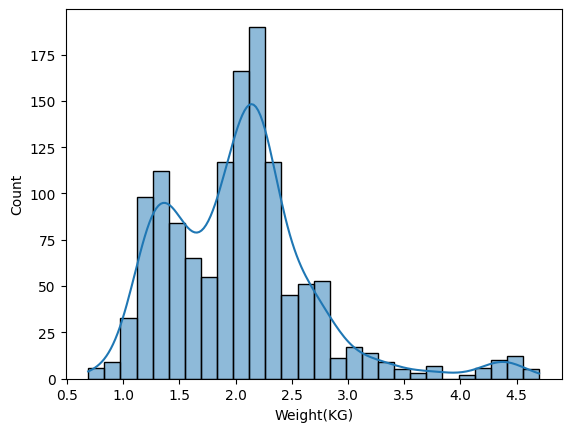

In [271]:
# Weight distribution
sns.histplot(df['Weight(KG)'], kde=True)

<Axes: xlabel='Price', ylabel='Count'>

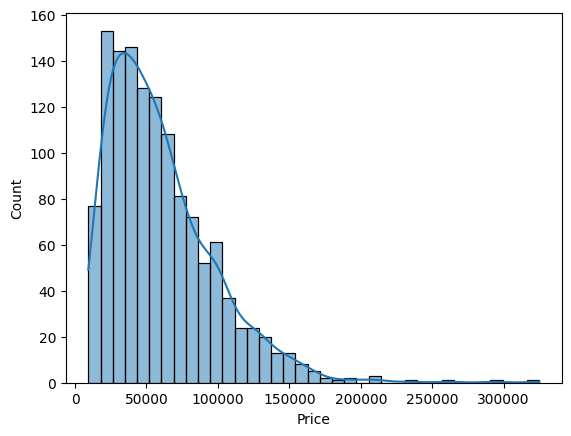

In [272]:
# Price distribution
sns.histplot(df['Price'], kde=True)

--> Price is right skewed so we apply log to make it symmetrical distribution

<Axes: xlabel='Price', ylabel='Count'>

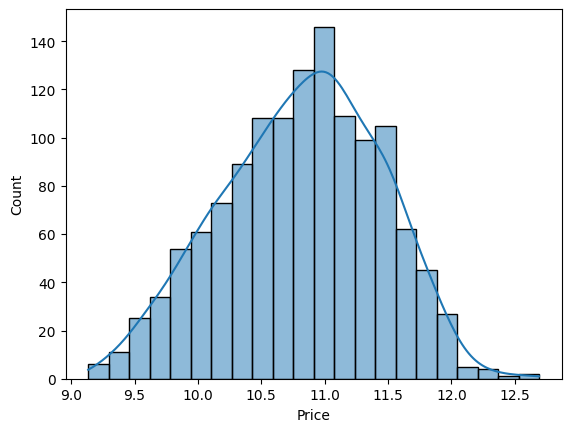

In [273]:
# Applying log on price distribution
sns.histplot(np.log(df['Price']),  kde=True)


## X, Y Split

In [274]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [275]:
x

,Company,TypeName,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,SSD,Hybrid,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,0,AMD,Windows


In [276]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [277]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=66)

In [282]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1041, 12), (261, 12), (1041,), (261,))

In [283]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [284]:
# Models Import
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [285]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 688 to 1044
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1041 non-null   object 
 1   TypeName     1041 non-null   object 
 2   Ram(GB)      1041 non-null   int64  
 3   Weight(KG)   1041 non-null   float64
 4   TouchScreen  1041 non-null   int64  
 5   Ips          1041 non-null   int64  
 6   ppi          1041 non-null   float64
 7   Cpu brand    1041 non-null   object 
 8   SSD          1041 non-null   int64  
 9   Hybrid       1041 non-null   int64  
 10  Gpu brand    1041 non-null   object 
 11  os           1041 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 105.7+ KB


## Linear Regression

In [286]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

linear_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

linear_pipe.fit(x_train, y_train)
y_pred = linear_pipe.predict(x_test)

print('Linear Regression R2 Score', r2_score(y_test, y_pred))
print('Linear Regression RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score 0.7901212545904399
Linear Regression RMSE:  0.27135952572538485


## Random Forest Regressor

In [290]:
steps1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

forest_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

forest_pipe.fit(x_train, y_train)
y_pred = forest_pipe.predict(x_test)

print("Random Forest Regressor R2 Score: ", r2_score(y_test, y_pred))
print("Random Forest Regressor RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))



Random Forest Regressor R2 Score:  0.8481951778425358
Random Forest Regressor RMSE:  0.23078289953390907


##  Decision Tree Regressor

In [291]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

tree_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

tree_pipe.fit(x_train, y_train)

y_pred = tree_pipe.predict(x_test)

print('Decision Tree R2 Score:', r2_score(y_test, y_pred))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Decision Tree R2 Score: 0.7793802653911657
Decision Tree RMSE: 0.27821658832945706


## KNN Regressor

In [292]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = KNeighborsRegressor()

knn_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

knn_pipe.fit(x_train, y_train)

y_pred = knn_pipe.predict(x_test)

print('KNN regressor R2 Score:', r2_score(y_test, y_pred))
print('KNN regressor RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

KNN regressor R2 Score: 0.8004925694400492
KNN regressor RMSE: 0.2645698673096692


## SVR 

In [294]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

svm_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

svm_pipe.fit(x_train, y_train)

y_pred = svm_pipe.predict(x_test)

print('SVR R2 Score:', r2_score(y_test, y_pred))
print('SVR RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


SVR R2 Score: 0.65718832993097
SVR RMSE: 0.3468076276425905


## Doing Hyper parameter Tunning

In [296]:
from sklearn.model_selection import GridSearchCV

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Price        1302 non-null   float64
 3   Ram(GB)      1302 non-null   int64  
 4   Weight(KG)   1302 non-null   float64
 5   TouchScreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   SSD          1302 non-null   int64  
 10  Hybrid       1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 142.4+ KB


In [315]:
# Columns to One-Hot Encode
categorical_cols = ['Company','TypeName','Cpu brand','Gpu brand','os']

# Create encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

# Fit and transform selected columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create dataframe for encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with original dataframe (excluding original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

In [304]:
df_encoded

,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,SSD,Hybrid,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,71378.6832,8,1.37,0,1,226.983005,128,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,47895.5232,8,1.34,0,0,127.677940,0,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30636.0000,8,1.86,0,0,141.211998,256,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,135195.3360,16,1.83,0,1,220.534624,512,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,96095.8080,8,1.37,0,1,226.983005,256,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,33992.6400,4,1.80,1,1,157.350512,128,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1298,79866.7200,16,1.30,1,1,276.053530,512,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1299,12201.1200,2,1.50,0,0,111.935204,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1300,40705.9200,6,2.19,0,0,100.454670,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
'''We split x and Y again so it dont be confused us'''

X = df_encoded.drop(columns=['Price'])
Y = np.log(df['Price'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=66)

#### Random Forest Regressor Hyperparameter Tunning

In [306]:
rf = RandomForestRegressor(random_state=66)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)


# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Test R²:", r2_score(Y_test, Y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE: 0.23735513343250178
Test R²: 0.8394258712636483


#### Linear Regression Hyperparameter Tunning

In [309]:
lr = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False] 
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)


# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Test R²:", r2_score(Y_test, Y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True, 'positive': False}
Test RMSE: 0.2713595257253802
Test R²: 0.790121254590447


#### KNN Neighbors Hyperparameter Tunning

In [311]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    # 'p': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)


# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Test R²:", r2_score(Y_test, Y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Test RMSE: 0.24761700114905938
Test R²: 0.8252411268770269


#### Decision Tree regressor Hyperparameter Tunning

In [314]:
dtr = DecisionTreeRegressor()

param_grid = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    cv=5,
    # scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)


# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Test R²:", r2_score(Y_test, Y_pred))

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Test RMSE: 0.27838887024711406
Test R²: 0.7791069491277572


*  "It is clear that the highest accuracy, even after hyperparameter tuning, is achieved by the Random Forest Regressor."The highest accuracy is between 83 - 85.So Random Forest is the best Model.So We select this model for predication

## Exporting The Model

In [317]:
import pickle

pickle.dump(forest_pipe, open('forest_model.pkl', 'wb'))
pickle.dump(df, open('df2.pkl', 'wb'))

In [316]:
df

,Company,TypeName,Price,Ram(GB),Weight(KG),TouchScreen,Ips,ppi,Cpu brand,SSD,Hybrid,Gpu brand,os
0,Apple,Ultrabook,71378.6832,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,47895.5232,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,30636.0000,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,135195.3360,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,96095.8080,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,33992.6400,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,79866.7200,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,12201.1200,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,40705.9200,6,2.19,0,0,100.454670,Intel Core i7,0,0,AMD,Windows
